In [49]:
### libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
#reading the data
data = pd.read_csv("loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [51]:
data.shape

(39717, 111)

In [52]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Removing all null columns

In [53]:
data.dropna(axis = 1, how = "all", inplace = True)
data.shape

(39717, 57)

### There many columns with single Value data, These do NOT help in analysis

In [54]:
data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [55]:
data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type',  'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
data.shape

(39717, 49)

### We see that below columns are not usefule for our analysis
-  "member_id", "url", "title", "emp_title", "zip_code", "addr_state" : These variables hold personal data. 
- "desc" has description which we do not require for analysis

### Customer behaviour variables
- last_pymnt_d:	Last month payment was received
- last_credit_pull_d:	The most recent month LC pulled credit for this loan
- mths_since_last_delinq: The number of months since the borrower's last delinquency.
- next_pymnt_d: Next scheduled payment date
- mths_since_last_record: The number of months since the last public record.
- chargeoff_within_12_mths : Number of charge-offs within 12 months


In [56]:
data.drop(['member_id','url','zip_code','emp_title','title','desc','pub_rec_bankruptcies','last_pymnt_d', 'last_credit_pull_d','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','chargeoff_within_12_mths'],axis=1,inplace=True)
data.shape

(39717, 36)

In [57]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

### Goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.

Fully paid: Applicant has fully paid the loan

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the lo

- We cannot make anything up for the current loans however for taking ration of charged off customers we need total count. 
- hence we are not removing the records with current loan status

In [58]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### Checking for missing values in percentage

In [59]:
(data.isna().sum()/len(data.index))*100

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0

### lets see what kind of data each column has. 

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

## Now we are handling Missing values for "emp_length", "revol_util" 

Lets see value counts for 'emp_length'

In [61]:
data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### Looking at above value counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the 'emp_lenth' column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [62]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.emp_length.isna().sum()

0

In [63]:
data['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

###  Treating revol_util

- revol_util is 'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.' 
- Modifying data in missing values may affect analysis, and missing percentage is very low hence removing those records. 

In [64]:
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
data.revol_util.isna().sum()

0

## Checking missing values if any

In [65]:
data.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_rec

## Standardizing the data columns 
- "revol_util" : Described as an object column, it has continous values. 
- "int_rate" : Described as an object column, it has continous values. 
- "emp_length":'< 1 year' kept as 0 and '10+ years' kept as 10. others kept as its own data as it is. 

In [66]:
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))
data.emp_length = pd.to_numeric(data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

## Adding new columns from date column analysis.
- month and year columns

In [67]:
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['year']=data['issue_d'].dt.year
data['month']=data['issue_d'].dt.month
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,2011,12
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,2011,12


## 'loan_amnt' , 'funded_amnt', 'funded_amnt_inv'

### Lets see distribution of three loan amount fields using distribution plot.


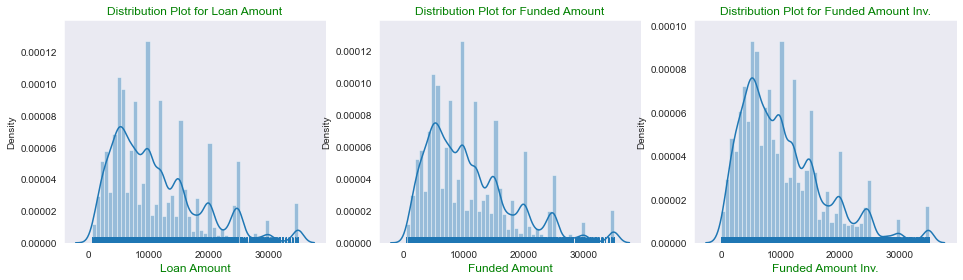

In [68]:


plt.figure(figsize=(16,9),facecolor='w')
sns.set_style("dark")
# subplot for loan_amnt
plt.subplot(2, 3, 1)
ax = sns.distplot(data['loan_amnt'],rug = True)
ax.set_title('Distribution Plot for Loan Amount',fontsize=12,color='g')
ax.set_xlabel('Loan Amount',fontsize=12,color='g')
# subplot for funded_amnt
plt.subplot(2, 3, 2)
ax = sns.distplot(data['funded_amnt'],rug = True)
ax.set_title('Distribution Plot for Funded Amount',fontsize=12,color='g')
ax.set_xlabel('Funded Amount',fontsize=12,color='g')
# subplot funded_amnt_inv
plt.subplot(2, 3, 3)
ax = sns.distplot(data['funded_amnt_inv'],rug = True)
ax.set_title('Distribution Plot for Funded Amount Inv.',fontsize=12,color='g')
ax.set_xlabel('Funded Amount Inv.',fontsize=12,color='g')
plt.show()



## Observation: 
- Distribution plots shows amounts for all three plots are very much similar.
- Hence for further analysis We will use only loan amount variable.

 ## Univariate Analysis for Loan Amount:

### Observations (loan amount):
- We see that most of the Loan amounts are in range of 5000 - 15000

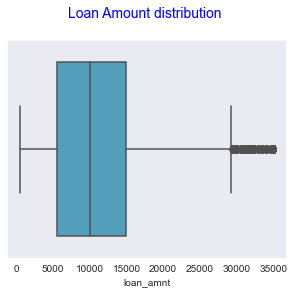

In [69]:
# univariate analysis for loan amount
fig, ax = plt.subplots(figsize = (5,4))
sns.boxplot(data['loan_amnt'], palette='GnBu_d')
ax.set_title('Loan Amount distribution \n',fontsize=14,color='b')
plt.show()

## Univariate Analysis for Annual Income

### Observations (Annual Income):
- We see that most of the annual Income are in range of 50000 - 80000, However there are outliers present

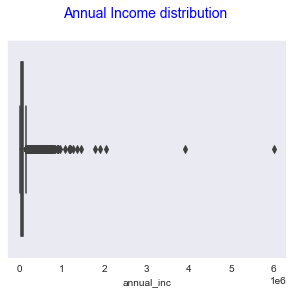

In [70]:
# univariate analysis for Annual Income
fig, ax = plt.subplots(figsize = (5,4))
sns.boxplot(data['annual_inc'])
ax.set_title('Annual Income distribution \n',fontsize=14,color='b')
plt.show()

#### In 'annual_inc' outliers are present.
- Removing outliers.
- First we will see the quantile information and will take an appropriate action.
- It seems that the values after 95 percentile to be disconected from the general distribution and also there is high increase in the value for small quantile variation.
- Hence we are removing outliers as > 0.95

In [71]:
quantile_Check = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_Check

0.50     59000.00
0.75     82400.00
0.90    116000.00
0.95    142000.00
0.97    165996.00
0.98    187000.00
0.99    234997.36
Name: annual_inc, dtype: float64

In [72]:
annual_inc_95quatile = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= annual_inc_95quatile]

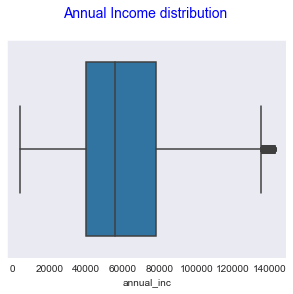

In [73]:
# univariate analysis for Annual Income without outliers

fig, ax = plt.subplots(figsize = (5,4))
sns.boxplot(data['annual_inc'])
ax.set_title('Annual Income distribution \n',fontsize=14,color='b')
plt.show()

## Univariate Analysis for Debt to income ratio

#### dti -  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

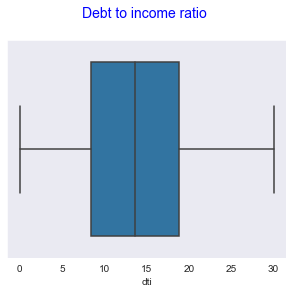

In [74]:
# univariate analysis for Annual Income without outliers

fig, ax = plt.subplots(figsize = (5,4))
sns.boxplot(data['dti'])
ax.set_title('Debt to income ratio \n',fontsize=14,color='b')
plt.show()

## Univariate Analysis for  Loan_Status 

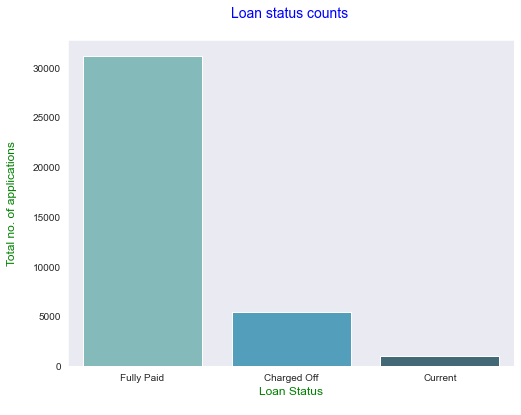

In [75]:
# univariate analysis for Loan status 
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = 'loan_status', data = data, palette='GnBu_d')
ax.set_title('Loan status counts \n',fontsize=14,color='b')
ax.set_ylabel('Total no. of applications\n',fontsize=12,color = 'g')
ax.set_xlabel('Loan Status\n',fontsize=12,color = 'g')
plt.show()

## Univariate Analysis for Intrest Rate:

### Observations (Intrest rate) :
- We see that most of the Interest Rates are in range of 10% - 15%

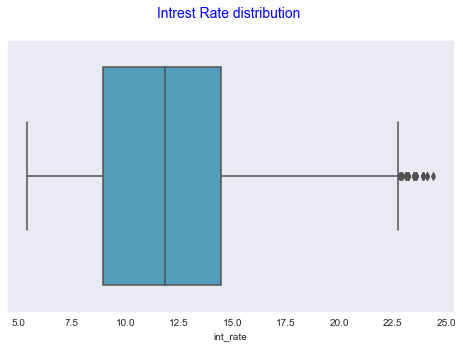

In [76]:

plt.show()
# univariate analysis for Intrest rate distribution 
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.boxplot(data.int_rate, palette='GnBu_d')
ax.set_title('Intrest Rate distribution \n',fontsize=14,color='b')
plt.show()

### Creating bins to make them categorical

In [77]:
data['int_rate_bins'] = pd.cut(data['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])

In [78]:
data['int_rate_bins'].value_counts()

10%-15%    17439
5%-10%     11969
15%-20%     7309
20%-25%      978
Name: int_rate_bins, dtype: int64

### Lets see 'dti' (debt to income ratio) and Creating bins to make them categorical

In [79]:
data['dti_bins'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

### Lets see 'revol_util' (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.) and Creating bins to make them categorical

In [80]:
data['revol_util_bins'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data['revol_util_bins'].value_counts()

40-60     8264
60-80     7862
20-40     7610
0-20      7445
80-100    6514
Name: revol_util_bins, dtype: int64

### Lets see 'annual_inc' (The self-reported annual income provided by the borrower during registration.) and Creating bins to make them categorical

In [81]:

data['annual_inc_bins'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
data['annual_inc_bins'].value_counts()

40000-60000    11598
20000-40000     8668
80000 +         8395
60000-80000     7859
0-20000         1175
Name: annual_inc_bins, dtype: int64

### Computing 'sub_grade' to only numeric

In [82]:
data['sub_grade'] = pd.to_numeric(data['sub_grade'].apply(lambda x:x[-1]))
data['sub_grade'].value_counts()

4    7895
3    7783
5    7637
2    7502
1    6878
Name: sub_grade, dtype: int64

## Analysis for Loan Amount vs Grade

### Observations :
- Here we see that when loan amount increase grade for get decreses for both Fully paid and charged off customers.
- when loan amount is low grade are good. 

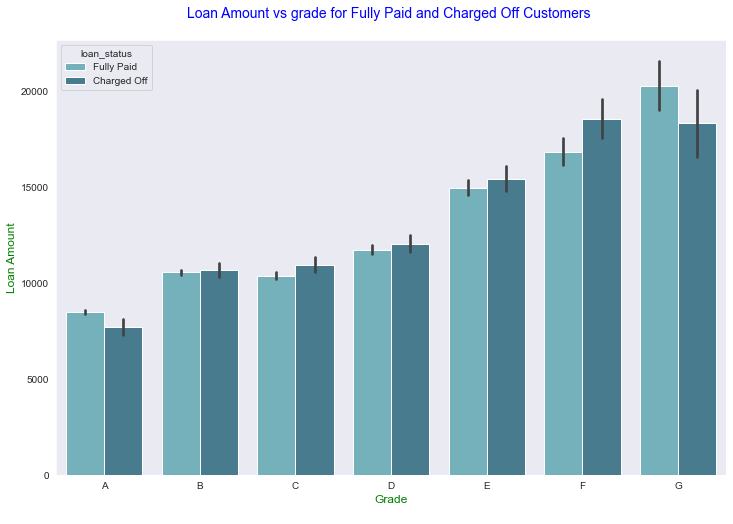

In [83]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],x = 'grade', y='loan_amnt',hue='loan_status',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='GnBu_d')
ax.set_title('Loan Amount vs grade for Fully Paid and Charged Off Customers \n',fontsize=14,color='b')
ax.set_ylabel('Loan Amount',fontsize=12,color = 'g')
ax.set_xlabel('Grade\n',fontsize=12,color = 'g')
plt.show()

## Analysis for Interest Rate vs Grade for fully paid and charged off customers

### Observations :
- A-grade is a top letter grade assigned for borrower.
- The higher the borrower's grade,the lower the interest rate offered to that borrower on a loan.
- It is clear that intrest rate is increasing with grades moving from A to G

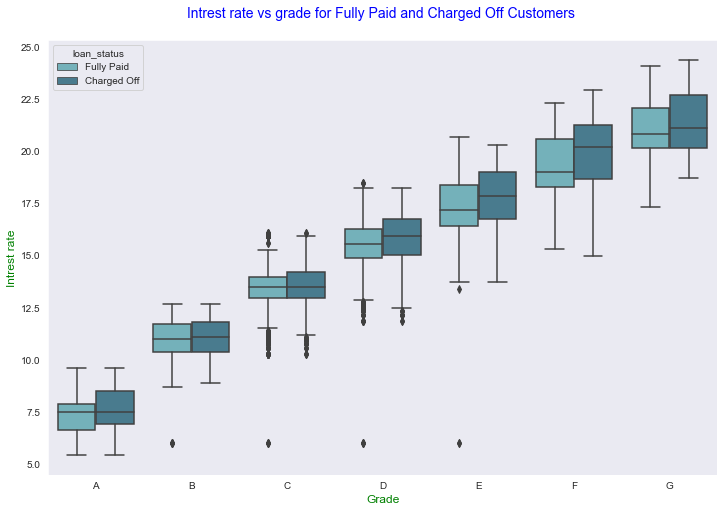

In [84]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.boxplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],x = 'grade', y='int_rate',hue='loan_status',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='GnBu_d')

ax.set_title('Intrest rate vs grade for Fully Paid and Charged Off Customers \n',fontsize=14,color='b')
ax.set_ylabel('Intrest rate',fontsize=12,color = 'g')
ax.set_xlabel('Grade\n',fontsize=12,color = 'g')
plt.show()

## Analysis of Purpose of loan vs Intrest rate for fully paid and charged off customers

### Observations :
- For 'Housing' Purpose intrest rate is very high compare to others


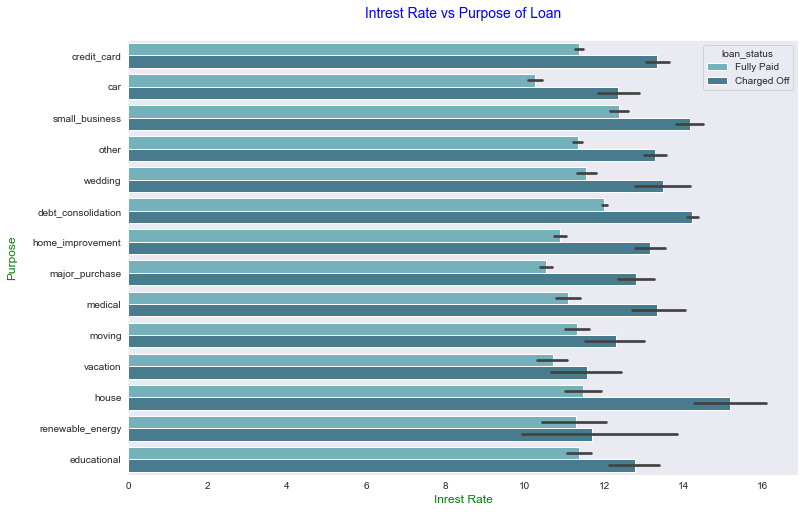

In [85]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],hue='loan_status',x='int_rate', y = 'purpose',palette='GnBu_d')
ax.set_title('Intrest Rate vs Purpose of Loan\n',fontsize=14,color='b')
ax.set_xlabel('Inrest Rate',fontsize=12,color = 'g')
ax.set_ylabel('Purpose\n',fontsize=12,color = 'g')
plt.show()

### Analysis of Purpose of Loan vs Loan amount for fully paid and charged off customers

### Observations :
- For 'Small Business' Purpose loan amount is very high compare to others for charged off customers


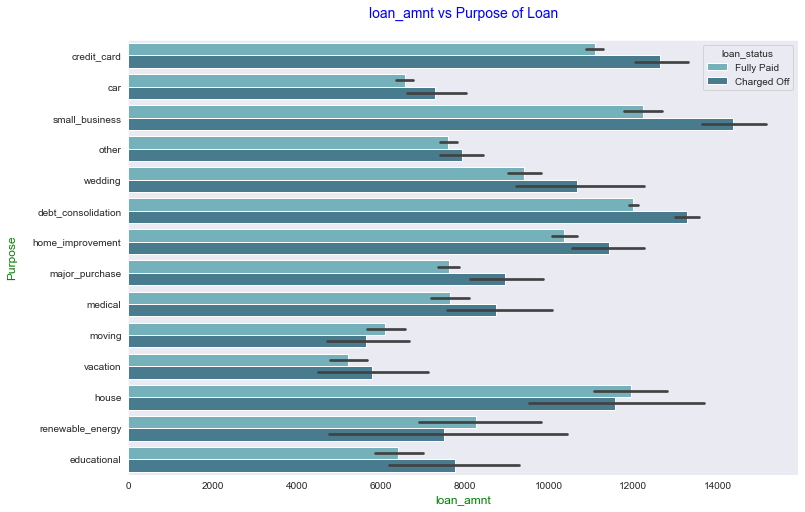

In [86]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],hue='loan_status',x='loan_amnt', y = 'purpose',palette='GnBu_d')
ax.set_title('loan_amnt vs Purpose of Loan\n',fontsize=14,color='b')
ax.set_xlabel('loan_amnt',fontsize=12,color = 'g')
ax.set_ylabel('Purpose\n',fontsize=12,color = 'g')
plt.show()

### Lets see loan amount and Creating bins to make them categorical

In [87]:
data['loan_amnt_bins'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


## Analysis for Loan amounts for Fully Paid and charged off customers

### Observations (loan amount):
- We see that most of the Loan amounts are in range of 5000 - 15000

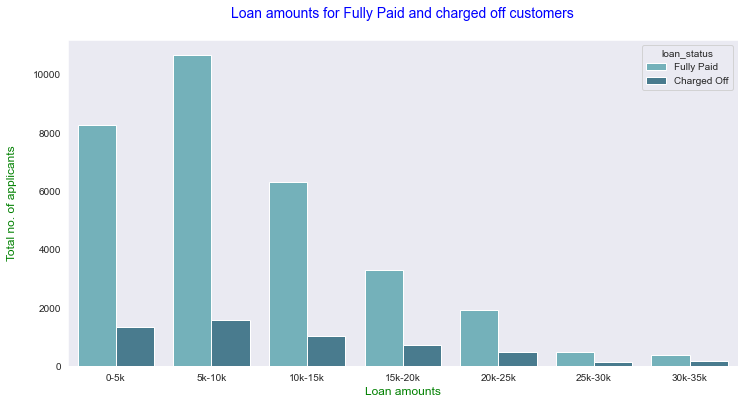

In [88]:
#bi-variate 
fig,ax = plt.subplots(figsize = (12,6))

ax= sns.countplot(x='loan_amnt_bins', hue = 'loan_status', data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])], palette='GnBu_d')
ax.set_title('Loan amounts for Fully Paid and charged off customers\n',fontsize=14,color='b')
ax.set_xlabel('Loan amounts',fontsize=12,color = 'g')
ax.set_ylabel('Total no. of applicants\n',fontsize=12,color = 'g')
plt.show()


## Bi-variate Analysis for Loan Amount vs Charged off scustomer ratio:

### Observations (loan amount):
- Higher the loan amount in range of 30k- 35K has high chance of charged-off 

In [89]:
ls_vs_loan = data.groupby(['loan_amnt_bins','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ls_vs_loan['Total'] = ls_vs_loan['Charged Off'] + ls_vs_loan['Current'] + ls_vs_loan['Fully Paid'] 
ls_vs_loan['Chargedoff_Ratio'] = (ls_vs_loan['Charged Off'] / ls_vs_loan['Total']) * 100
ls_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,loan_amnt_bins,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
6,30k-35k,154,73,387,614,25.081433
5,25k-30k,123,66,456,645,19.069767
4,20k-25k,482,147,1922,2551,18.894551
3,15k-20k,702,222,3274,4198,16.722249
0,0-5k,1330,103,8258,9691,13.724074
2,10k-15k,1038,297,6297,7632,13.600629
1,5k-10k,1576,146,10642,12364,12.746684


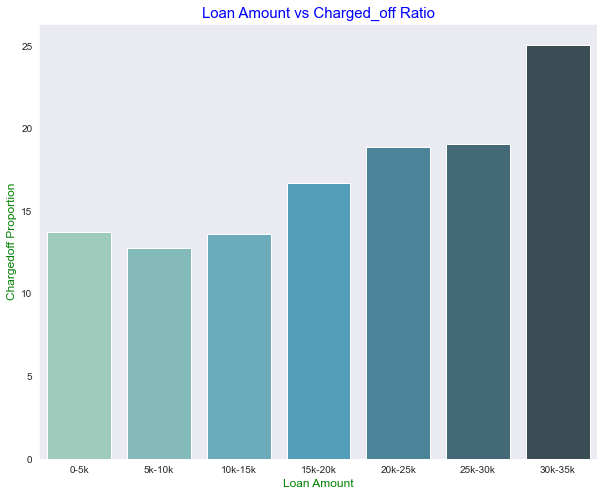

In [90]:
fig, ax1 = plt.subplots(figsize=(10, 8),facecolor='w')
ax1.set_title('Loan Amount vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='loan_amnt_bins', y='Chargedoff_Ratio', data=ls_vs_loan, palette='GnBu_d')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('Loan Amount',fontsize=12,color='g')
plt.show()

## Analysis of Intrest rate vs loan amount for Fully paid and charged off customers

### Observations :
 - Higher the loan amounts shows increment in intrest rate.

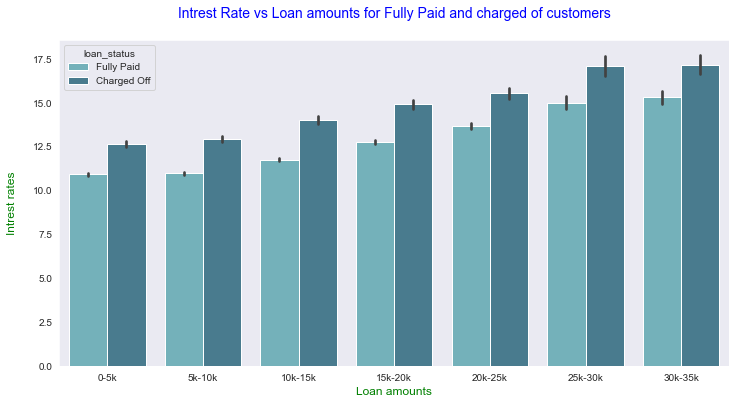

In [91]:
fig,ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],x='loan_amnt_bins', y = 'int_rate', hue = 'loan_status', palette='GnBu_d')
ax.set_title('Intrest Rate vs Loan amounts for Fully Paid and charged of customers\n',fontsize=14,color='b')
ax.set_xlabel('Loan amounts',fontsize=12,color = 'g')
ax.set_ylabel('Intrest rates\n',fontsize=12,color = 'g')
plt.show()

## Total number of loan applications issued over the years
### Observation 
- total count of loan application is increasing every passing year.
- so increase in number of loan applications are adding more to number of charged off applications in upcoming year.

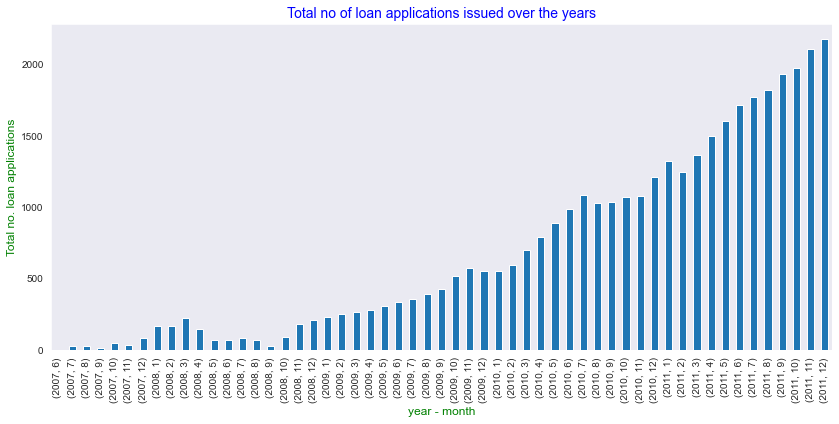

In [92]:
plt.figure(figsize=(14,6),facecolor='w')
data.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Total no. loan applications',fontsize=12,color='g')
plt.xlabel('year - month',fontsize=12,color = 'g')      
plt.title("Total no of loan applications issued over the years",fontsize=14,color='b')
plt.show()


In [93]:
data['term'].value_counts()

 36 months    27703
 60 months     9992
Name: term, dtype: int64

## Observations (The number of payments on the loan (in Months)) :
- Below plot shows that those who had taken loan to repay in 36 months had more % of number of applicants getting 

Text(0.5, 0, 'Loan Repayment Term')

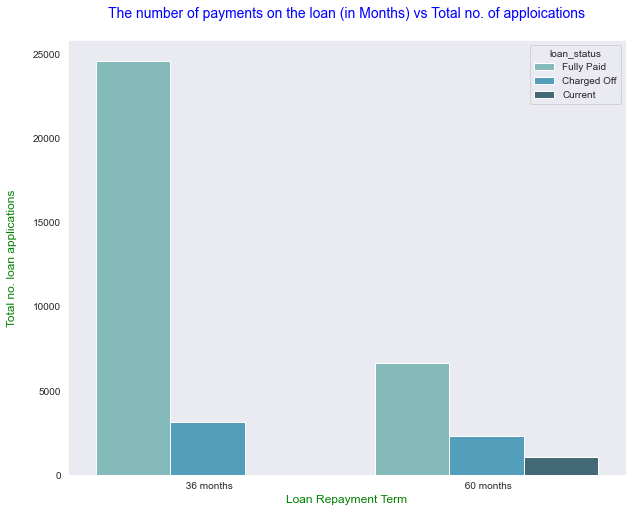

In [94]:
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.countplot(x ='term', hue='loan_status' ,data=data, palette='GnBu_d')
ax.set_title('The number of payments on the loan (in Months) vs Total no. of apploications\n',fontsize=14,color='b')
ax.set_ylabel('Total no. loan applications\n',fontsize=12,color = 'g')
ax.set_xlabel('Loan Repayment Term',fontsize=12,color = 'g')


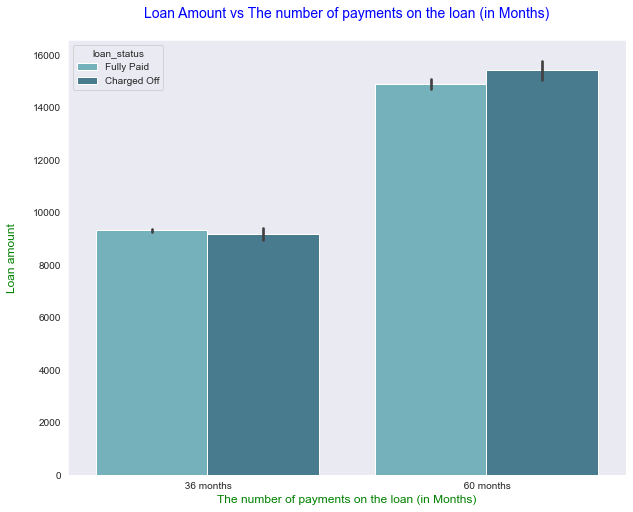

In [95]:
plt.figure(figsize=(10,8))
ax= sns.barplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],x='term', y='loan_amnt', hue="loan_status",  palette='GnBu_d')
ax.set_title('Loan Amount vs The number of payments on the loan (in Months)\n',fontsize=14,color='b')
ax.set_ylabel('Loan amount\n',fontsize=12,color = 'g')
ax.set_xlabel('The number of payments on the loan (in Months)',fontsize=12,color = 'g')
plt.show()    

In [96]:
Term_vs_loan = data.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Term_vs_loan['Total'] = Term_vs_loan['Charged Off'] + Term_vs_loan['Current'] + Term_vs_loan['Fully Paid'] 
Term_vs_loan['Chargedoff_Ratio'] = (Term_vs_loan['Charged Off'] / Term_vs_loan['Total']) * 100
Term_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)


loan_status,term,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
1,60 months,2301.0,1054.0,6637.0,9992.0,23.028423
0,36 months,3104.0,0.0,24599.0,27703.0,11.204563


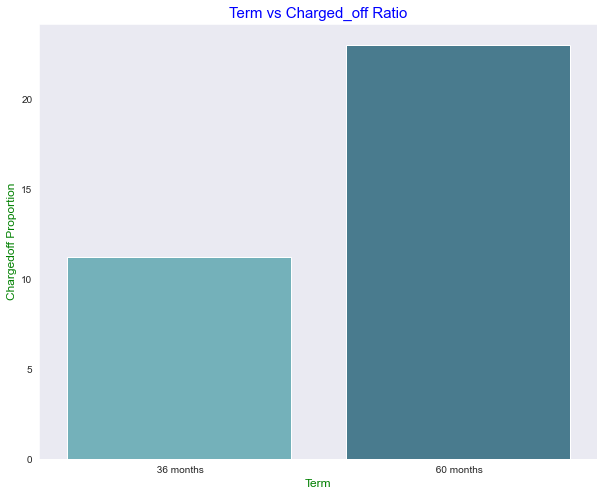

In [97]:
fig, ax1 = plt.subplots(figsize=(10, 8),facecolor='w')
ax1.set_title('Term vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='term', y='Chargedoff_Ratio', data=Term_vs_loan, palette='GnBu_d')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('Term',fontsize=12,color='g')
plt.show()

## Analysis on annual income against Chargedoff_ratio 

### Observations:
- Annual income is 80000+  has less chances of charged off.
- Annual income is between 0-20000 has high chances of charged off.
- It suggest  that with increase in annual income charged off proportion got decreased.

In [98]:


range_vs_loan = data.groupby(['annual_inc_bins', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
range_vs_loan['Total'] = range_vs_loan['Charged Off'] + range_vs_loan['Current'] + range_vs_loan['Fully Paid'] 
range_vs_loan['Chargedoff_Ratio'] = range_vs_loan['Charged Off'] / range_vs_loan['Total']
range_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

 

loan_status,annual_inc_bins,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
0,0-20000,233,9,933,1175,0.198298
1,20000-40000,1507,170,6991,8668,0.173858
2,40000-60000,1725,345,9528,11598,0.148733
3,60000-80000,1023,240,6596,7859,0.130169
4,80000 +,917,290,7188,8395,0.109232


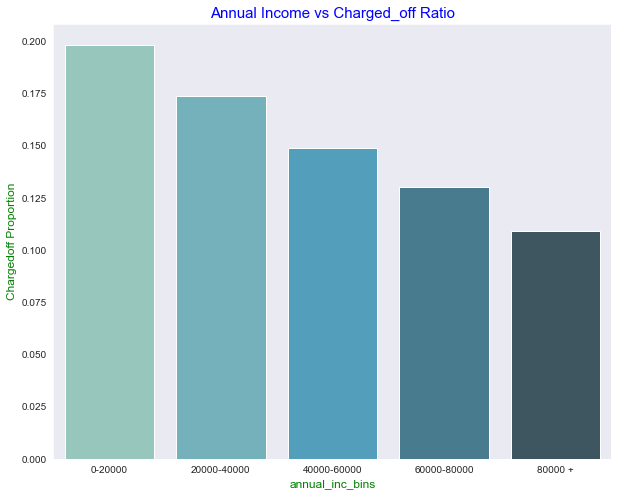

In [99]:
fig, ax1 = plt.subplots(figsize=(10, 8),facecolor='w')
ax1.set_title('Annual Income vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='annual_inc_bins', y='Chargedoff_Ratio', data=range_vs_loan, palette='GnBu_d')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('annual_inc_bins',fontsize=12,color='g')
plt.show()

## Analysis on Purpose of loan against Chargedoff_ratio

### Observations:
- 'wedding, major_purchase, car' purposes shows less chances of charged off.
- 'Small Business Purpose' shows high chances of charged off.

In [100]:
purpose_vs_loan = data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Ratio'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
11,small_business,454.0,72.0,1172.0,1698.0,0.267373
10,renewable_energy,18.0,1.0,77.0,96.0,0.187500
3,educational,54.0,0.0,255.0,309.0,0.174757
8,moving,90.0,7.0,458.0,555.0,0.162162
7,medical,103.0,9.0,536.0,648.0,0.158951
9,other,601.0,116.0,3087.0,3804.0,0.157992
5,house,55.0,12.0,283.0,350.0,0.157143
2,debt_consolidation,2674.0,548.0,14630.0,17852.0,0.149787
12,vacation,52.0,6.0,312.0,370.0,0.140541
4,home_improvement,319.0,82.0,2240.0,2641.0,0.120788


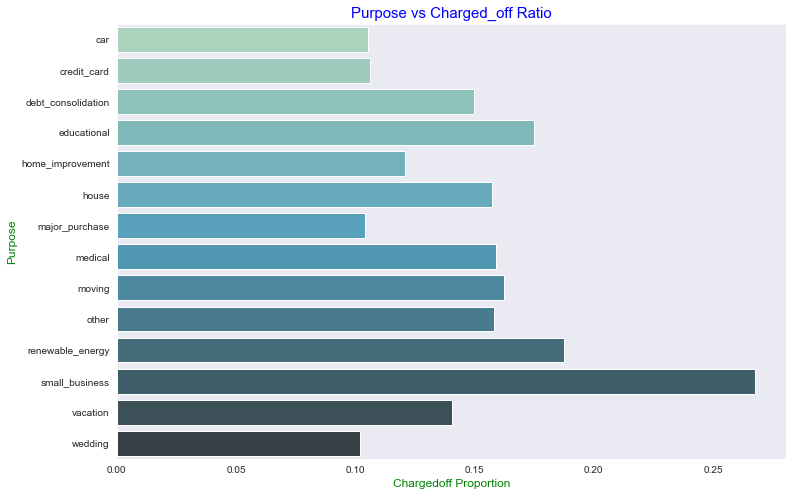

In [101]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Purpose vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(y='purpose', x='Chargedoff_Ratio', data=purpose_vs_loan , palette='GnBu_d')
ax1.set_xlabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_ylabel('Purpose',fontsize=12,color='g')
plt.show()

## Analysis on Intrest rate against Chargedoff_ratio 

### Observations:
- Low intrest rate shows less chances of charged off.
- High intrest rate shows high chances of charged off.


In [102]:
intrest_vs_loan = data.groupby(['int_rate_bins', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intrest_vs_loan['Total'] = intrest_vs_loan['Charged Off'] + intrest_vs_loan['Current'] + intrest_vs_loan['Fully Paid'] 
intrest_vs_loan['Chargedoff_Ratio'] = intrest_vs_loan['Charged Off'] / intrest_vs_loan['Total']
intrest_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,int_rate_bins,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
3,20%-25%,338,109,531,978,0.345603
2,15%-20%,1692,376,5241,7309,0.231495
1,10%-15%,2554,494,14391,17439,0.146453
0,5%-10%,821,75,11073,11969,0.068594


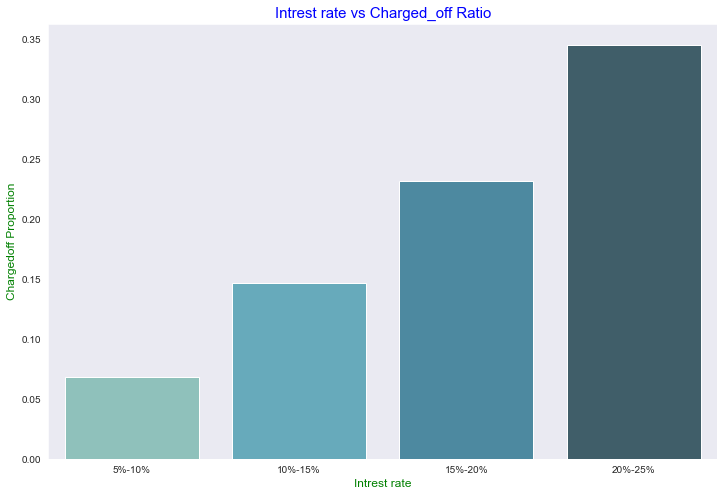

In [103]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Intrest rate vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='int_rate_bins', y='Chargedoff_Ratio', data=intrest_vs_loan , palette='GnBu_d')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('Intrest rate',fontsize=12,color='g')
plt.show()

## Analysis on debt to income ratio

#### dti = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

### Observation
- Annual income with dti(Debt-to-income ratio) is negatively correalted.
- Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
- That means when annual income is low DTI is high & vice versa.


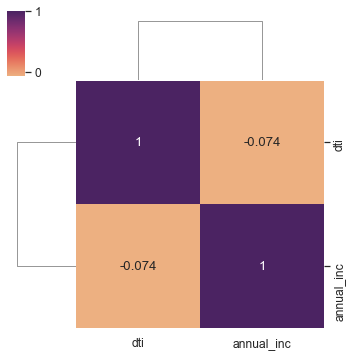

In [104]:
res = data[["dti","annual_inc"]]
loan_correlation = res.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(5, 5),cmap="flare")
plt.show()



## Analysis of debt to income ratio vs Intrest rate

### Observations:
- If debt to income ratio is low then interest rate will be low.
- Plot shows no significant variation but there is slight increase in interest rate with increase in debt to income ratio.

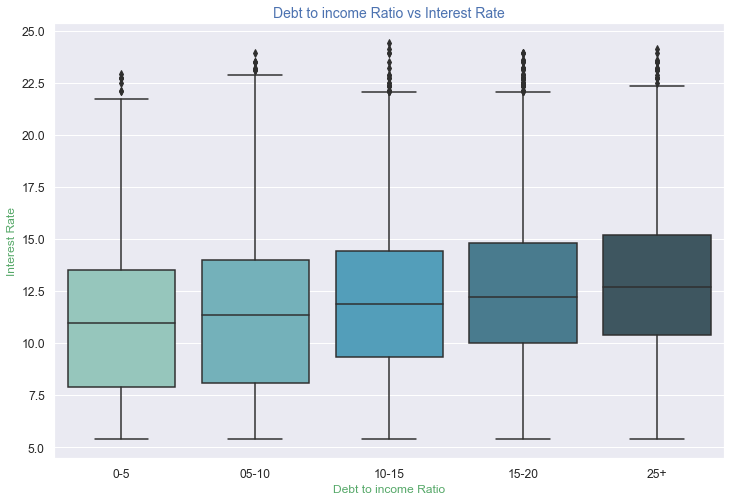

In [105]:
plt.figure(figsize=(12,8),facecolor='w')
ax = sns.boxplot(y='int_rate', x='dti_bins', data =data,palette='GnBu_d')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=14,color='b')
ax.set_ylabel('Interest Rate',fontsize=12,color = 'g')
ax.set_xlabel('Debt to income Ratio',fontsize=12,color = 'g')
plt.show()


## Analysis on Debt to income ratio against Chargedoff_ratio

### Observations:
 
- if there is Debt to income ratio is high then it shows high chances of charged off.

In [106]:
dti_vs_loan = data.groupby(['dti_bins', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Current'] + dti_vs_loan['Fully Paid'] 
dti_vs_loan['Chargedoff_Ratio'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,dti_bins,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
4,25+,1100,232,5355,6687,0.164498
3,15-20,1344,273,7178,8795,0.152814
2,10-15,1345,242,7821,9408,0.142963
1,05-10,943,170,6326,7439,0.126764
0,0-5,559,79,3892,4530,0.123400


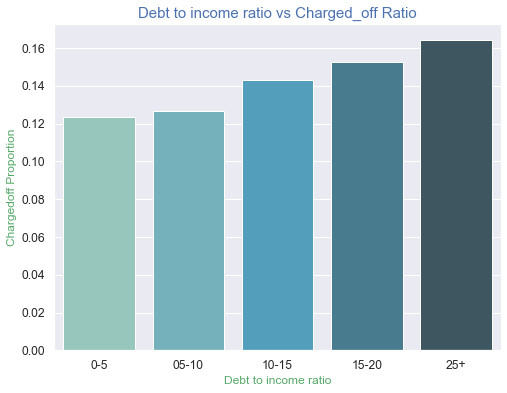

In [107]:
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('Debt to income ratio vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='dti_bins', y='Chargedoff_Ratio', data=dti_vs_loan , palette='GnBu_d')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('Debt to income ratio',fontsize=12,color='g')
plt.show()

## Analysis off  Years on Chargedoff_ratio



In [108]:
year_vs_loan = data.groupby(['year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
year_vs_loan['Total'] = year_vs_loan['Charged Off'] + year_vs_loan['Current'] + year_vs_loan['Fully Paid'] 
year_vs_loan['Chargedoff_Ratio'] = year_vs_loan['Charged Off'] / year_vs_loan['Total']
year_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,year,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
0,2007,41.0,0.0,189.0,230.0,0.178261
1,2008,233.0,0.0,1248.0,1481.0,0.157326
4,2011,3141.0,1054.0,16313.0,20508.0,0.153160
3,2010,1426.0,0.0,9581.0,11007.0,0.129554
2,2009,564.0,0.0,3905.0,4469.0,0.126203


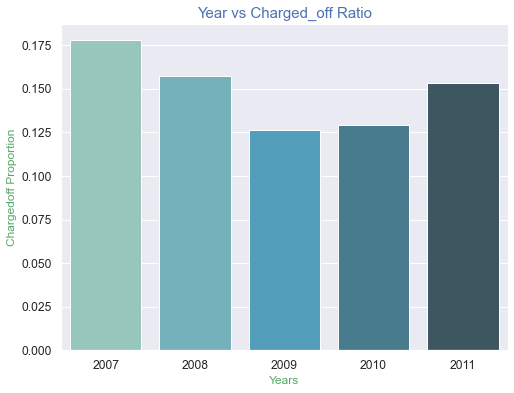

In [109]:
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('Year vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='year', y='Chargedoff_Ratio', data=year_vs_loan , palette='GnBu_d')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('Years',fontsize=12,color='g')
plt.show()

## Analysis on Number of derogatory public records against Chargedoff_ratio

### Observations:
 
- if there is number of derogatory public records then it shows high chances of charged off.

In [110]:
pubrec_vs_loan = data.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pubrec_vs_loan['Total'] = pubrec_vs_loan['Charged Off'] + pubrec_vs_loan['Current'] + pubrec_vs_loan['Fully Paid'] 
pubrec_vs_loan['Chargedoff_Ratio'] = pubrec_vs_loan['Charged Off'] / pubrec_vs_loan['Total']
pubrec_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
1,1,449.0,41.0,1515.0,2005.0,0.223940
2,2,10.0,2.0,36.0,48.0,0.208333
0,0,4946.0,1011.0,29677.0,35634.0,0.138800
3,3,0.0,0.0,6.0,6.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


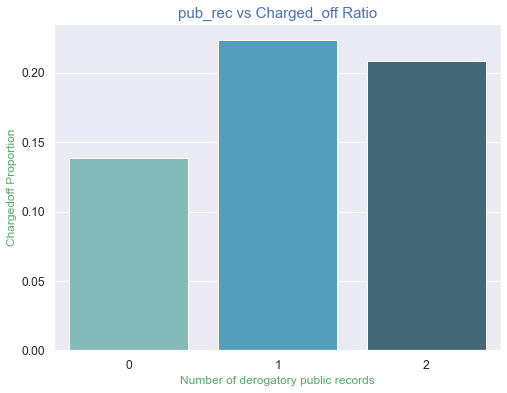

In [111]:
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('pub_rec vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Ratio', data=pubrec_vs_loan[pubrec_vs_loan['Charged Off'] > 0] , palette='GnBu_d')
ax1.set_ylabel('Chargedoff Proportion',fontsize=12,color = 'g')
ax1.set_xlabel('Number of derogatory public records',fontsize=12,color='g')
plt.show()

## Analysis of Purpose vs loan amount proportion

In [112]:
#df1 =pd.pivot_table(data=loan,index='purpose',columns='loan_status',values='loan_amnt',aggfunc='sum')
ln_type =pd.pivot_table(data=data,index='purpose',columns='loan_status',values='loan_amnt',aggfunc='count')
ln_cnt =ln_type[['Charged Off','Fully Paid']].apply(lambda x:x/x.sum(),axis=1)
ln_cnt

loan_status,Charged Off,Fully Paid
purpose,,
car,0.109116,0.890884
credit_card,0.108255,0.891745
debt_consolidation,0.154531,0.845469
educational,0.174757,0.825243
home_improvement,0.124658,0.875342
house,0.162722,0.837278
major_purchase,0.105675,0.894325
medical,0.161189,0.838811
moving,0.164234,0.835766


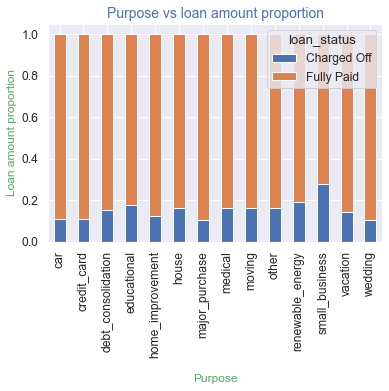

In [113]:

ax = ln_cnt.plot(kind='bar',stacked="False")
ax.set_title('Purpose vs loan amount proportion',fontsize=14,color = 'b')

ax.set_ylabel('Loan amount proportion',fontsize=12,color = 'g')
ax.set_xlabel('\nPurpose',fontsize=12,color='g')
plt.show()

## Analysis of recoveries vs annual_inc for charged off customers only

### Observations:
- We see that most of the recoveries done for as it have high income

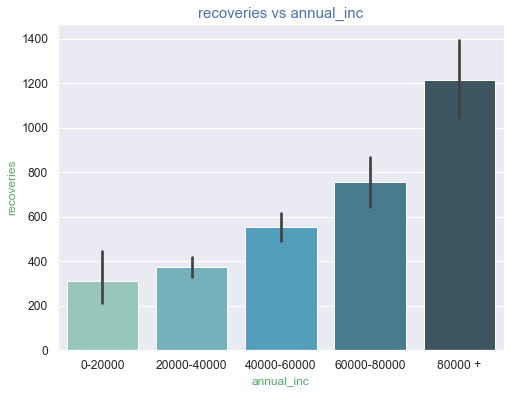

In [114]:
recoveries1 = data[data["loan_status"] == 'Charged Off']
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('recoveries vs annual_inc',fontsize=15,color = 'b')
ax1=sns.barplot(x='annual_inc_bins', y='recoveries', data=recoveries1 , palette='GnBu_d')
ax1.set_ylabel('recoveries',fontsize=12,color = 'g')
ax1.set_xlabel('annual_inc',fontsize=12,color='g')
plt.show()

## Analysis of verification_status vs Loan amount for Charged Off and Fully customers


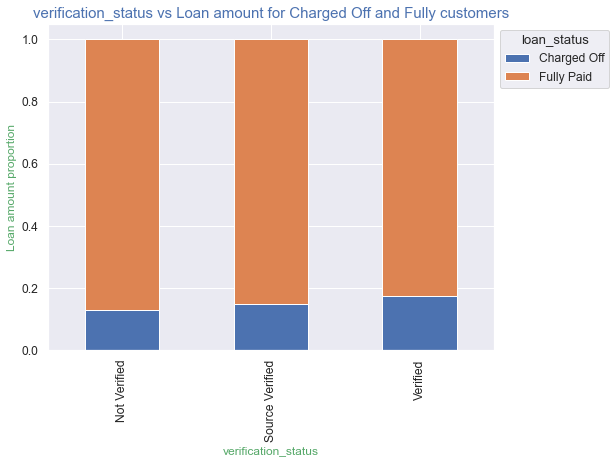

In [115]:
#df1 =pd.pivot_table(data=loan,index='purpose',columns='loan_status',values='loan_amnt',aggfunc='sum')
ln_verf =pd.pivot_table(data=data,index='verification_status',columns='loan_status',values='loan_amnt',aggfunc='count')
ln_cnt =ln_verf[['Charged Off','Fully Paid']].apply(lambda x:x/x.sum(),axis=1)
#ln_cnt
ax1 = ln_cnt.plot(kind='bar',stacked="False",figsize=[8,6])
ax1.set_title('verification_status vs Loan amount for Charged Off and Fully customers',fontsize=15,color = 'b')
ax1.set_xlabel('verification_status',fontsize=12,color = 'g')
ax1.set_ylabel('Loan amount proportion',fontsize=12,color='g')
#sns.move_legend(ax1, "upper center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True)
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1,1))

plt.show()
# Verification of source has No impact on default. The process of verification need to be revisited.

## Analysis of Verification status on Chargedoff_ratio

### Observations:
 
- if verification status is verified then it shows high chances of charged off.

In [116]:
Verify_vs_loan = data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Verify_vs_loan['Total'] = Verify_vs_loan['Charged Off'] + Verify_vs_loan['Current'] + Verify_vs_loan['Fully Paid'] 
Verify_vs_loan['Chargedoff_Ratio'] = (Verify_vs_loan['Charged Off'] / Verify_vs_loan['Total'])*100
Verify_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
2,Verified,1945,547,9285,11777,16.515242
1,Source Verified,1370,282,7781,9433,14.523481
0,Not Verified,2090,225,14170,16485,12.678192


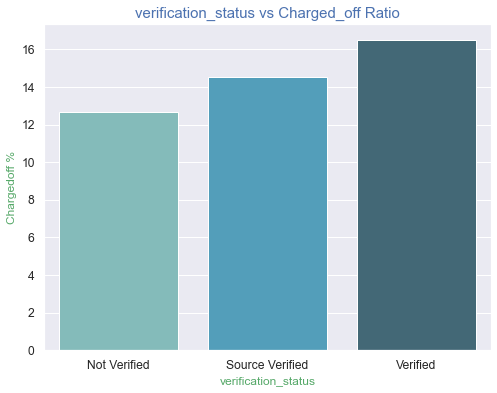

In [117]:
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('verification_status vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Ratio', data=Verify_vs_loan , palette='GnBu_d')
ax1.set_ylabel('Chargedoff %',fontsize=12,color = 'g')
ax1.set_xlabel('verification_status',fontsize=12,color='g')
plt.show()

## Analysis of Home ownership vs Loan amount for Charged Off and Fully customers

### Observations :
- home ownership also has not much impact on default.

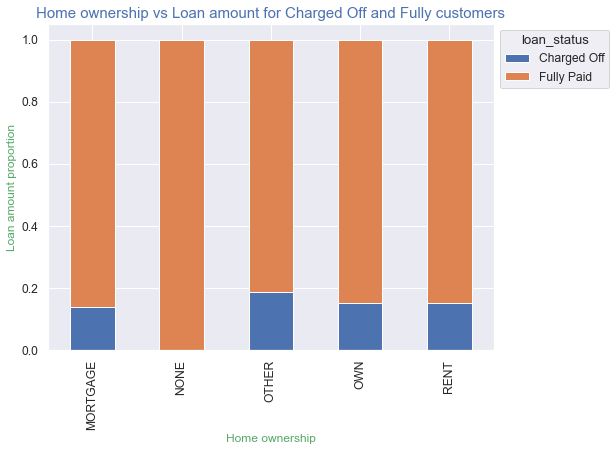

In [118]:
##df1 =pd.pivot_table(data=loan,index='purpose',columns='loan_status',values='loan_amnt',aggfunc='sum')

ln_home =pd.pivot_table(data=data,index='home_ownership',columns='loan_status',values='loan_amnt',aggfunc='count')
ln_cnt =ln_home[['Charged Off','Fully Paid']].apply(lambda x:x/x.sum(),axis=1)

ax1 = ln_cnt.plot(kind='bar',stacked="False",figsize=[8,6])
ax1.set_title('Home ownership vs Loan amount for Charged Off and Fully customers',fontsize=15,color = 'b')
ax1.set_xlabel('Home ownership',fontsize=12,color = 'g')
ax1.set_ylabel('Loan amount proportion',fontsize=12,color='g')
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1,1))
plt.show()


## Analysis of Home Ownership on Chargedoff_ratio

### Observations:
 
- if home ownership is other then it shows high chances of charged off.

In [119]:
HO_vs_loan = data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
HO_vs_loan['Total'] = HO_vs_loan['Charged Off'] + HO_vs_loan['Current'] + HO_vs_loan['Fully Paid'] 
HO_vs_loan['Chargedoff_Ratio'] = (HO_vs_loan['Charged Off'] / HO_vs_loan['Total'])*100
HO_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,home_ownership,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
2,OTHER,17.0,0.0,74.0,91.0,18.681319
4,RENT,2763.0,404.0,15242.0,18409.0,15.008963
3,OWN,432.0,80.0,2418.0,2930.0,14.744027
0,MORTGAGE,2193.0,570.0,13499.0,16262.0,13.485426
1,NONE,0.0,0.0,3.0,3.0,0.000000


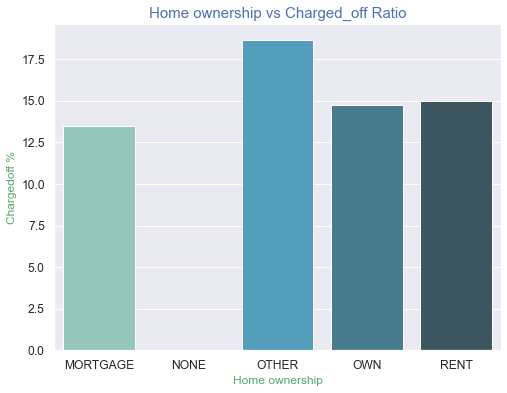

In [120]:
fig, ax1 = plt.subplots(figsize=(8, 6),facecolor='w')
ax1.set_title('Home ownership vs Charged_off Ratio',fontsize=15,color = 'b')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Ratio', data=HO_vs_loan , palette='GnBu_d')
ax1.set_ylabel('Chargedoff %',fontsize=12,color = 'g')
ax1.set_xlabel('Home ownership',fontsize=12,color='g')
plt.show()

## Analysis of Employee length vs Loan amount for Charged Off and Fully customers

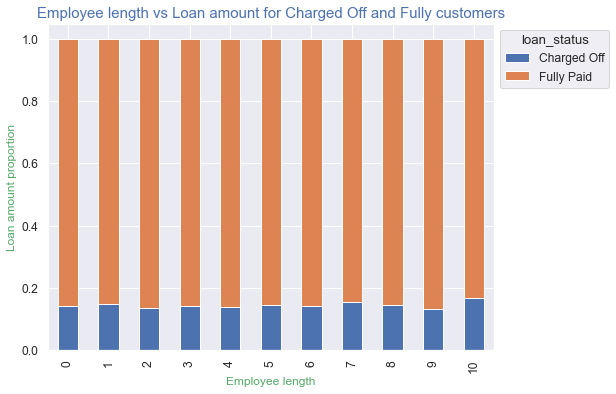

In [121]:
ln_emp =pd.pivot_table(data=data,index='emp_length',columns='loan_status',values='loan_amnt',aggfunc='count')
ln_cnt =ln_emp[['Charged Off','Fully Paid']].apply(lambda x:x/x.sum(),axis=1)

ax1 = ln_cnt.plot(kind='bar',stacked="False",figsize=[8,6])

ax1.set_title('Employee length vs Loan amount for Charged Off and Fully customers',fontsize=15,color = 'b')
ax1.set_xlabel('Employee length',fontsize=12,color = 'g')
ax1.set_ylabel('Loan amount proportion',fontsize=12,color='g')
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1,1))

plt.show()

## Analysis of Purpose of loan vs Debt to income ratio

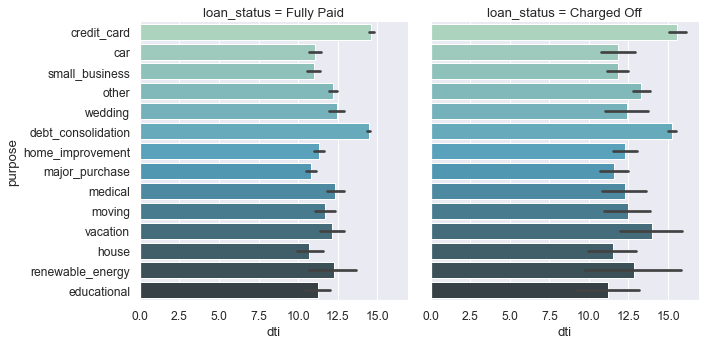

In [122]:
ax1 =sns.factorplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],y='purpose',x='dti',col='loan_status',kind='bar',  palette='GnBu_d')



## Analysis of States vs Loan amount for Charged off and fully paid customers

### Observations:
 
- for 'WY' state high amounts of loan taken

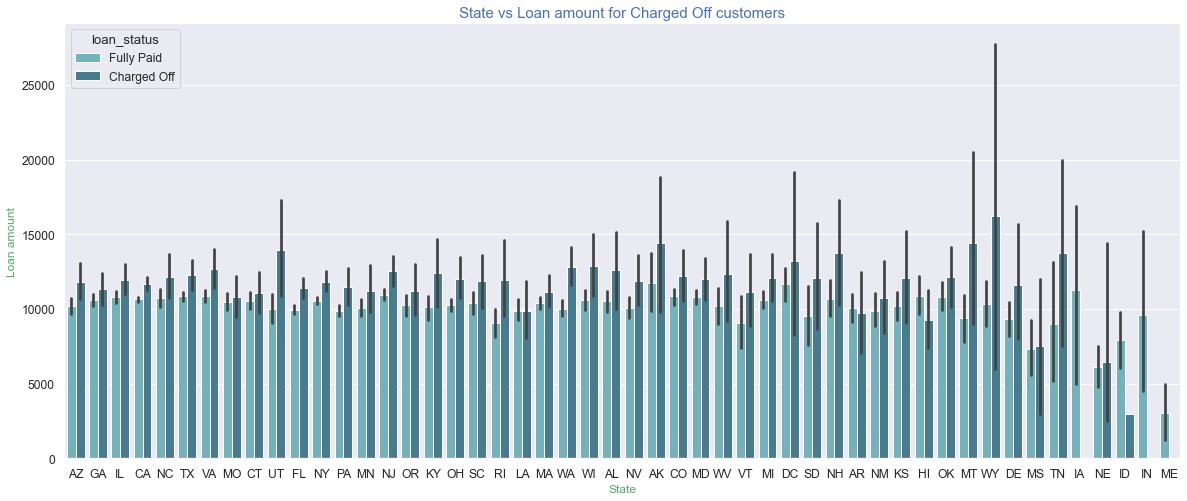

In [123]:
plt.figure(figsize=(20,8))
ax1 = sns.barplot(x='addr_state', y='loan_amnt', hue = 'loan_status', data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],  palette='GnBu_d')
ax1.set_title('State vs Loan amount for Charged Off customers',fontsize=15,color = 'b')
ax1.set_xlabel('State',fontsize=12,color = 'g')
ax1.set_ylabel('Loan amount',fontsize=12,color='g')
plt.show()



## Analysis of states on Chargedoff_ratio

### Observations:
 
- NE state shows high chances of charged off.

In [124]:
state_vs_loan = data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Ratio'] = (state_vs_loan['Charged Off'] / state_vs_loan['Total'])*100
state_vs_loan.sort_values('Chargedoff_Ratio', ascending=False)

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Ratio
28,NE,3.0,0.0,2.0,5.0,60.000000
32,NV,103.0,16.0,354.0,473.0,21.775899
13,ID,1.0,0.0,4.0,5.0,20.000000
40,SD,12.0,2.0,49.0,63.0,19.047619
0,AK,13.0,2.0,58.0,73.0,17.808219
9,FL,484.0,80.0,2171.0,2735.0,17.696527
11,HI,28.0,7.0,131.0,166.0,16.867470
24,MO,110.0,16.0,537.0,663.0,16.591252
31,NM,30.0,5.0,147.0,182.0,16.483516
4,CA,1072.0,135.0,5488.0,6695.0,16.011949


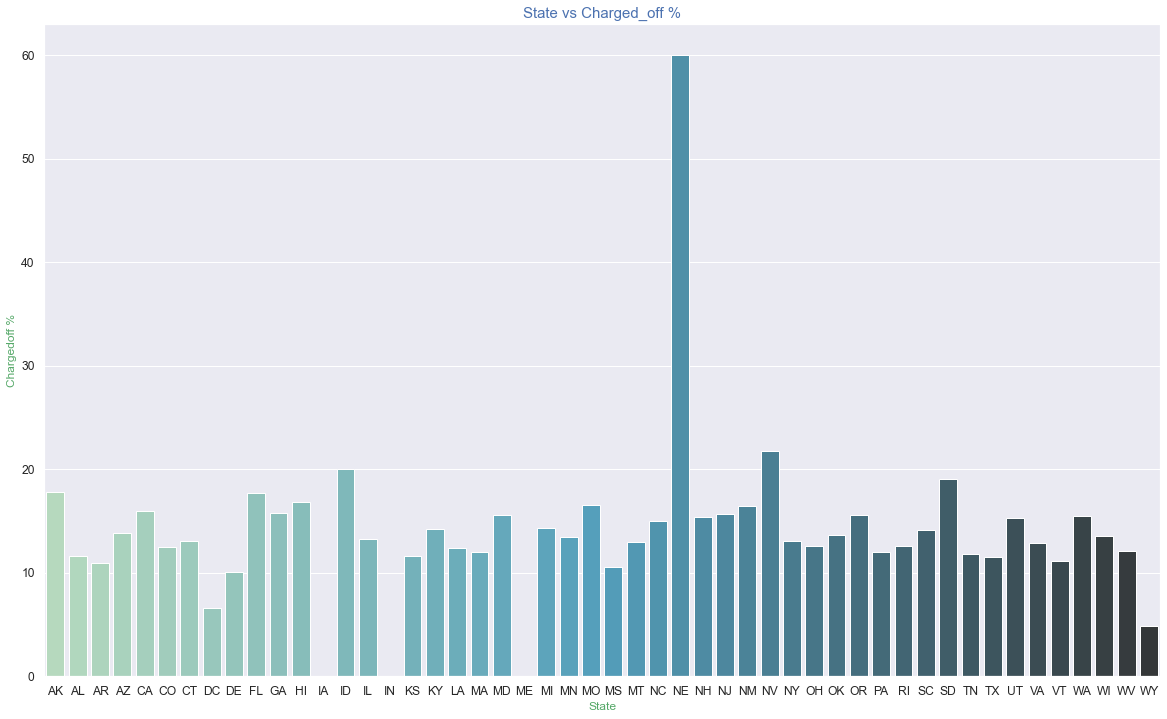

In [125]:
fig, ax1 = plt.subplots(figsize=(20, 12),facecolor='w')
ax1.set_title('State vs Charged_off %',fontsize=15,color = 'b')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Ratio', data=state_vs_loan , palette='GnBu_d')

ax1.set_ylabel('Chargedoff %',fontsize=12,color = 'g')
ax1.set_xlabel('State',fontsize=12,color='g')

plt.show()

## Analysis of Revolving line utilization rate vs Grade for Fully Paid and Charged Off customers


### Observations :
- Higher loan amount are associated with lower grade for longer terms.

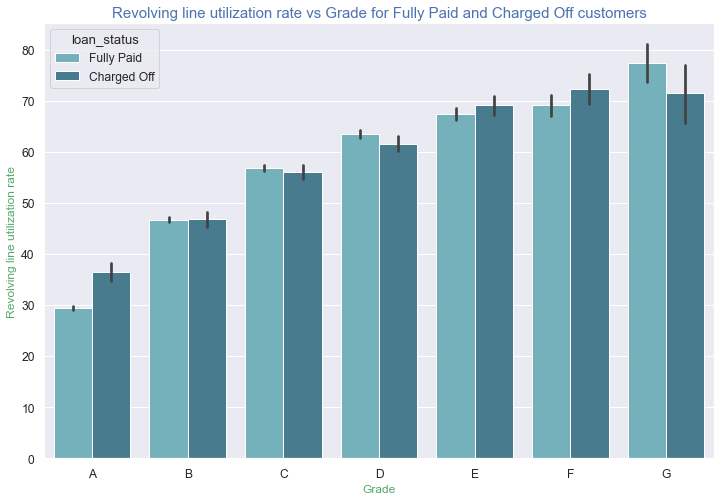

In [126]:
plt.figure(figsize=(12,8))
ax1 = sns.barplot(data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])],x='grade', y='revol_util', hue="loan_status", estimator=np.mean,order='ABCDEFG', palette='GnBu_d')
ax1.set_title('Revolving line utilization rate vs Grade for Fully Paid and Charged Off customers',fontsize=15,color = 'b')
ax1.set_xlabel('Grade',fontsize=12,color = 'g')
ax1.set_ylabel('Revolving line utilization rate',fontsize=12,color='g')
plt.show()


## Analysis of Delinquency in past 2 years vs Intrest rate for Fully Paid and Charged Off customers


### Observations :
- not much investment when account has more delinquency

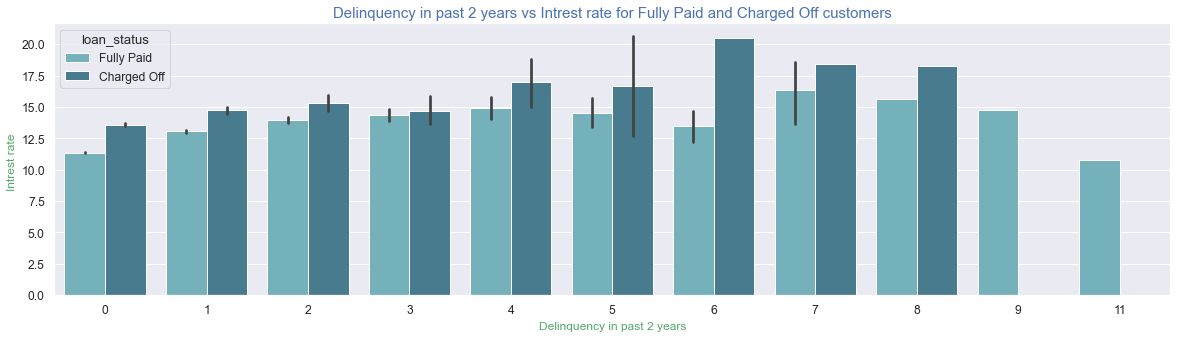

In [127]:
plt.figure(figsize=(20,5))
ax1 = sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])], estimator=np.mean, palette='GnBu_d')
ax1.set_title('Delinquency in past 2 years vs Intrest rate for Fully Paid and Charged Off customers',fontsize=15,color = 'b')
ax1.set_xlabel('Delinquency in past 2 years',fontsize=12,color = 'g')
ax1.set_ylabel('Intrest rate ',fontsize=12,color='g')
plt.show()


## Analysis of Delinquency in past 2 years vs Loan Amount for Charged Off customers with Grades


### Observations :
- higher the delinquency 

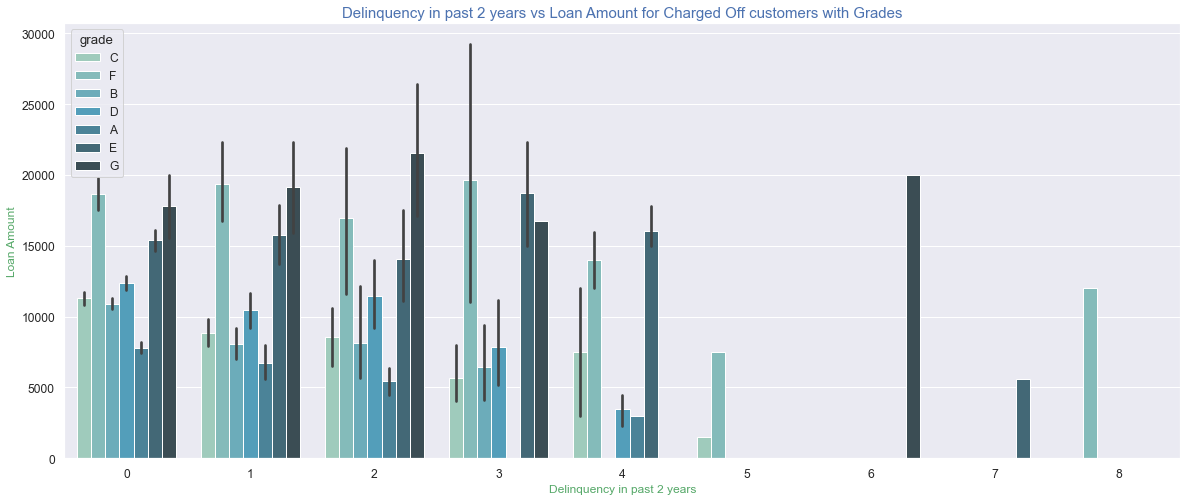

In [128]:
plt.figure(figsize=(20,8))
ax1 = sns.barplot(x='delinq_2yrs', hue = 'grade',y='loan_amnt',data=data[data['loan_status'].isin (['Charged Off'])], palette='GnBu_d')
ax1.set_title('Delinquency in past 2 years vs Loan Amount for Charged Off customers with Grades',fontsize=15,color = 'b')
ax1.set_xlabel('Delinquency in past 2 years',fontsize=12,color = 'g')
ax1.set_ylabel('Loan Amount',fontsize=12,color='g')
plt.show()


## Analysis of Delinquency in past 2 years for all grades for Charged Off customers


<Figure size 1440x360 with 0 Axes>

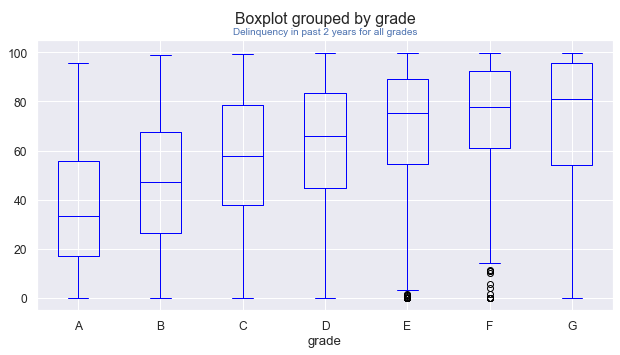

In [129]:
plt.figure(figsize=(20,5))
DF = data[data['loan_status'].isin (['Charged Off'])]
ax1 = DF.boxplot(column='revol_util', by='grade',figsize=(10,5),color="blue")
ax1.set_title('\n\nDelinquency in past 2 years for all grades',fontsize=10,color = 'b')

plt.show()

## Analysis of Number of derogatory public records vs Total no. of applications for Fully Paid and Charged Off customers


### Observations :
- avoid offering loan to person having higher Pub bankuptsy 

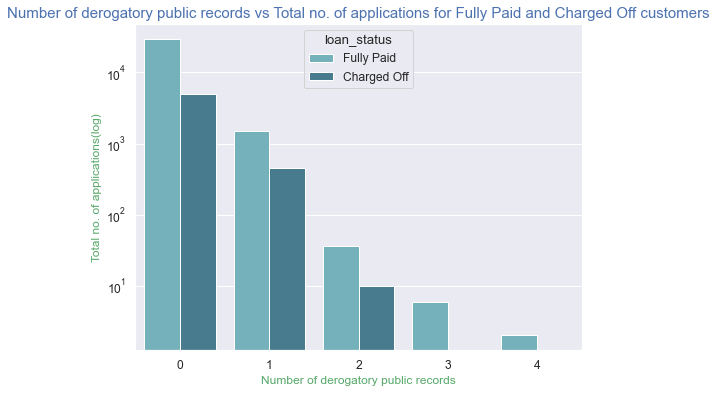

In [130]:
plt.figure(figsize=(8,6))
#ax=sns.countplot(x='pub_rec',data=loan[loan['loan_status'].isin(['Charged Off'])])
ax1=sns.countplot(x='pub_rec',hue= 'loan_status',data=data[data['loan_status'].isin (['Fully Paid','Charged Off'])], palette='GnBu_d')
ax1.set(yscale='log')
ax1.set_title('Number of derogatory public records vs Total no. of applications for Fully Paid and Charged Off customers',fontsize=15,color = 'b')
ax1.set_xlabel('Number of derogatory public records',fontsize=12,color = 'g')
ax1.set_ylabel('Total no. of applications(log)',fontsize=12,color='g')
plt.show()


## Analysis of Number of derogatory public records vs Loan amount for Charged Off and Fully customers


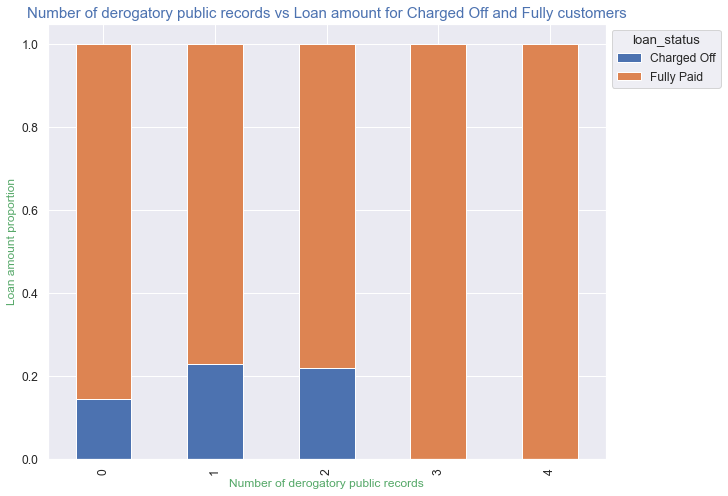

In [131]:
ln_pub =pd.pivot_table(data=data,index='pub_rec',columns='loan_status',values='loan_amnt',aggfunc='count')
ln_cnt =ln_pub[['Charged Off','Fully Paid']].apply(lambda x:x/x.sum(),axis=1)
#ln_cnt
ax1 = ln_cnt.plot(kind='bar',stacked="False",figsize=[10,8])
ax1.set_title('Number of derogatory public records vs Loan amount for Charged Off and Fully customers',fontsize=15,color = 'b')
ax1.set_xlabel('Number of derogatory public records',fontsize=12,color = 'g')
ax1.set_ylabel('Loan amount proportion',fontsize=12,color='g')
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1,1))

plt.show()